<a href="https://colab.research.google.com/github/ZiadSakr5/ZezoSakr/blob/main/Another_copy_of_Deep_Learning_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Deep Learning Practical Assignment (Adult Income Dataset)

## 📌 Dataset
We will use the **Adult Income dataset** (also known as the Census Income dataset).  
The task is to predict whether a person earns **more than $50K/year** based on demographic and employment attributes.

---


In [ ]:
# Option 1: Using OpenML via scikit-learn
from sklearn.datasets import fetch_openml
import pandas as pd

# Load dataset from OpenML
adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame

print(df.head())
print(df.shape)  # (48842, 15)

# Separate features and target
X = df.drop(columns="class")
y = df["class"]


   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country  class  
0       

## Part 0: Data Preparation
1. Load the dataset into a DataFrame.
2. Split the data into **training, validation, and test sets**.  
   - Suggested: 70% training, 15% validation, 15% test.
3. Apply any necessary preprocessing:
   - Handle categorical features (encoding).
   - Scale numerical features if needed.
4. After training your models, always report results on:
   - **Training accuracy**
   - **Validation accuracy**
   - **Test accuracy**
5. At the end of the assignment, **compare all methods** across train, validation, and test sets.



## Part 1: Optimizers
1. Train the same neural network using:
   - Stochastic Gradient Descent (SGD)
   - SGD with Momentum
   - Adam
2. Compare the training and validation accuracy for each optimizer.
3. Which optimizer converges the fastest? Which gives the best generalization?
4. Explain *why* Adam often performs better than plain SGD.

---


## Part 2: Batch Size
1. Train the same model with different batch sizes (e.g., 1, 32, 128, 1024).
2. Compare:
   - Training speed
   - Validation accuracy
   - Test accuracy
   - Generalization ability
3. Which batch size leads to the **noisiest gradient updates**?
4. Which batch size generalizes better and why?


## Part 3: Overfitting and Regularization
1. Train a large neural network (many parameters) on the dataset.
2. Observe training vs. validation accuracy.  
   - Do you see signs of overfitting?
3. Apply regularization techniques:
   - **L2 regularization**
   - **Dropout**
4. Compare the validation results before and after regularization.
5. Which regularization method was more effective in reducing overfitting? Why?

---


## Part 4: Early Stopping
1. Train the model for many epochs without early stopping.  
   - Plot training, validation, and test curves.
2. Train again with **early stopping** (monitor validation loss).
3. Compare the number of epochs trained and the final validation/test accuracy.
4. Explain how early stopping helps prevent overfitting.

---

## Part 5: Reflection
1. Summarize what you learned about:
   - The role of optimizers
   - The effect of batch size
   - Regularization methods
   - Early stopping
   - Train/validation/test splits
2. If you had to train a deep learning model on a new tabular dataset, what choices would you make for:
   - Optimizer
   - Batch size
   - Regularization
   - Early stopping
   - Data splitting strategy  
   and why?

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


try:
    adult = fetch_openml(name="adult", version=2, as_frame=True, parser='auto')
    df = adult.frame
    print("Dataset loaded successfully from OpenML.")
except Exception as e:
    print(f"Could not fetch data from OpenML. Error: {e}")
    print("Please check your internet connection or try again later.")

print("\nOriginal Data Head:")
print(df.head())
print("\nOriginal Data Shape:", df.shape)
print("\nData Info:")
df.info()

Dataset loaded successfully from OpenML.

Original Data Head:
   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0       

In [2]:
X = df.drop(columns="class")
y = df["class"]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("Target variable 'class' has been encoded.")
print(f"Original classes: {label_encoder.classes_}")
print(f"Encoded classes: {np.unique(y)}")

Target variable 'class' has been encoded.
Original classes: ['<=50K' '>50K']
Encoded classes: [0 1]


In [3]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("--- Data Split Shapes ---")
print(f"Training set shape:   {X_train.shape} ({len(y_train)} labels)")
print(f"Validation set shape: {X_val.shape} ({len(y_val)} labels)")
print(f"Test set shape:       {X_test.shape} ({len(y_test)} labels)")

--- Data Split Shapes ---
Training set shape:   (34189, 14) (34189 labels)
Validation set shape: (7326, 14) (7326 labels)
Test set shape:       (7327, 14) (7327 labels)


In [4]:
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

print("--- Feature Types Identified ---")
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

print("\nPreprocessing pipelines created successfully.")

--- Feature Types Identified ---
Numerical features: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

Preprocessing pipelines created successfully.


In [5]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'
)


X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

print("--- Processed Data Shapes ---")
print("Processed training set shape:", X_train_processed.shape)
print("Processed validation set shape:", X_val_processed.shape)
print("Processed test set shape:", X_test_processed.shape)
print("\nData preparation is complete. The data is now ready for model training.")

--- Processed Data Shapes ---
Processed training set shape: (34189, 105)
Processed validation set shape: (7326, 105)
Processed test set shape: (7327, 105)

Data preparation is complete. The data is now ready for model training.


In [6]:
!pip install tensorflow


In [7]:
!pip install tensorflow.keras


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import pandas as pd

def create_model(optimizer, input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])


    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


input_shape = X_train_processed.shape[1]

EPOCHS = 50
BATCH_SIZE = 64
histories = {}

print("--- Training with SGD Optimizer ---")

model_sgd = create_model(optimizer=SGD(), input_shape=input_shape)

history_sgd = model_sgd.fit(
    X_train_processed, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val),
    verbose=0
)

histories['SGD'] = history_sgd
print("SGD model training complete.")

--- Training with SGD Optimizer ---
SGD model training complete.


In [9]:
print("--- Training with SGD + Momentum Optimizer ---")

optimizer_momentum = SGD(momentum=0.9)

model_momentum = create_model(optimizer=optimizer_momentum, input_shape=input_shape)

history_momentum = model_momentum.fit(
    X_train_processed, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val),
    verbose=0
)

histories['SGD with Momentum'] = history_momentum
print("SGD with Momentum model training complete.")

--- Training with SGD + Momentum Optimizer ---
SGD with Momentum model training complete.


In [10]:
print("--- Training with Adam Optimizer ---")

model_adam = create_model(optimizer=Adam(), input_shape=input_shape)

history_adam = model_adam.fit(
    X_train_processed, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val),
    verbose=0
)

histories['Adam'] = history_adam
print("Adam model training complete.")

--- Training with Adam Optimizer ---
Adam model training complete.


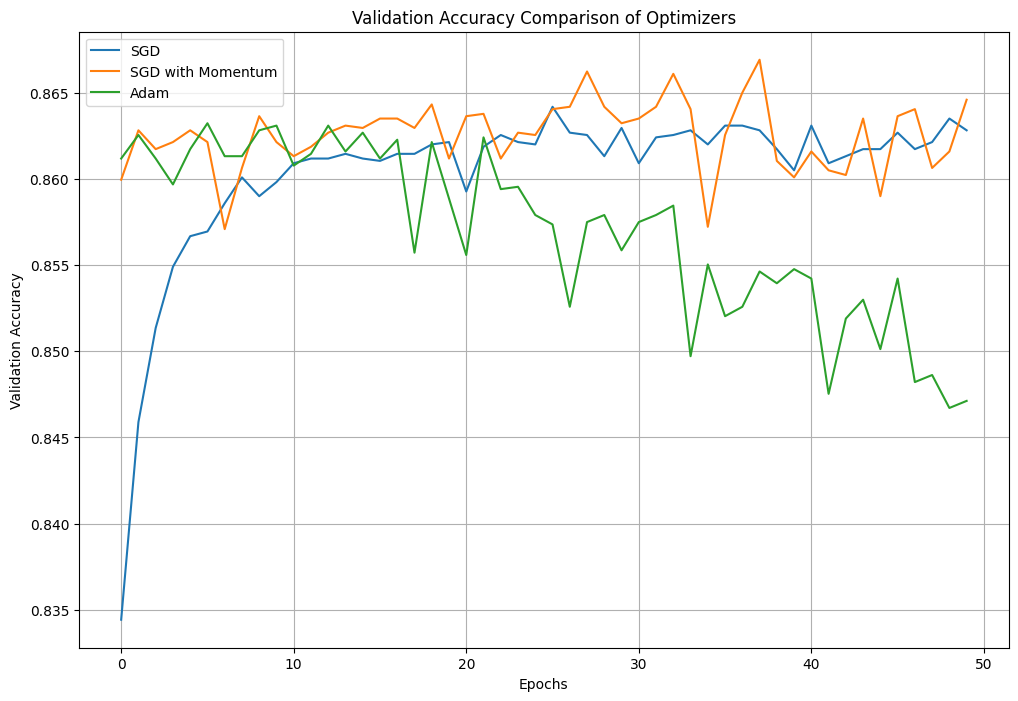

In [11]:
plt.figure(figsize=(12, 8))

for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)

plt.title('Validation Accuracy Comparison of Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Adam and SGD with Momentum achieve high accuracy almost instantly. Standard SGD starts slow and needs about 10 epochs to catch up . but it is the most stable and consistent performer after its initial climb.**

In [12]:
train_loss_sgd, train_acc_sgd = model_sgd.evaluate(X_train_processed, y_train, verbose=0)
val_loss_sgd, val_acc_sgd = model_sgd.evaluate(X_val_processed, y_val, verbose=0)
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(X_test_processed, y_test, verbose=0)

train_loss_mom, train_acc_mom = model_momentum.evaluate(X_train_processed, y_train, verbose=0)
val_loss_mom, val_acc_mom = model_momentum.evaluate(X_val_processed, y_val, verbose=0)
test_loss_mom, test_acc_mom = model_momentum.evaluate(X_test_processed, y_test, verbose=0)

train_loss_adam, train_acc_adam = model_adam.evaluate(X_train_processed, y_train, verbose=0)
val_loss_adam, val_acc_adam = model_adam.evaluate(X_val_processed, y_val, verbose=0)
test_loss_adam, test_acc_adam = model_adam.evaluate(X_test_processed, y_test, verbose=0)

results_df = pd.DataFrame({
    'Optimizer': ['SGD', 'SGD with Momentum', 'Adam'],
    'Training Accuracy': [train_acc_sgd, train_acc_mom, train_acc_adam],
    'Validation Accuracy': [val_acc_sgd, val_acc_mom, val_acc_adam],
    'Test Accuracy': [test_acc_sgd, test_acc_mom, test_acc_adam]
}).set_index('Optimizer')

print("--- Final Accuracy Results ---")
print(results_df)

--- Final Accuracy Results ---
                   Training Accuracy  Validation Accuracy  Test Accuracy
Optimizer                                                               
SGD                         0.860013             0.862817       0.856421
SGD with Momentum           0.872942             0.864592       0.854920
Adam                        0.894293             0.847120       0.843456


**all three optimizers perform similarly on the training and validation accuracy, hovering around the same level.**

In [13]:
import time

def create_model(optimizer='adam', input_shape=X_train_processed.shape[1]):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

batch_sizes = [1, 32, 128, 1024]
EPOCHS = 20

histories_bs = {}
models_bs = {}
training_times = {}

In [ ]:
# Cell 2: Train Models with Different Batch Sizes

for bs in batch_sizes:
    print(f"--- Training with Batch Size: {bs} ---")

    # Create a new model for each experiment
    model = create_model()

    # Record start time
    start_time = time.time()

    # Train the model
    history = model.fit(
        X_train_processed, y_train,
        epochs=EPOCHS,
        batch_size=bs,
        validation_data=(X_val_processed, y_val),
        verbose=0 # Set to 1 to see epoch-by-epoch logs
    )

    # Record end time and calculate duration
    end_time = time.time()
    training_times[bs] = end_time - start_time

    # Store history and the trained model
    histories_bs[bs] = history
    models_bs[bs] = model

    print(f"Training finished in {training_times[bs]:.2f} seconds.")

print("\nAll models have been trained.")

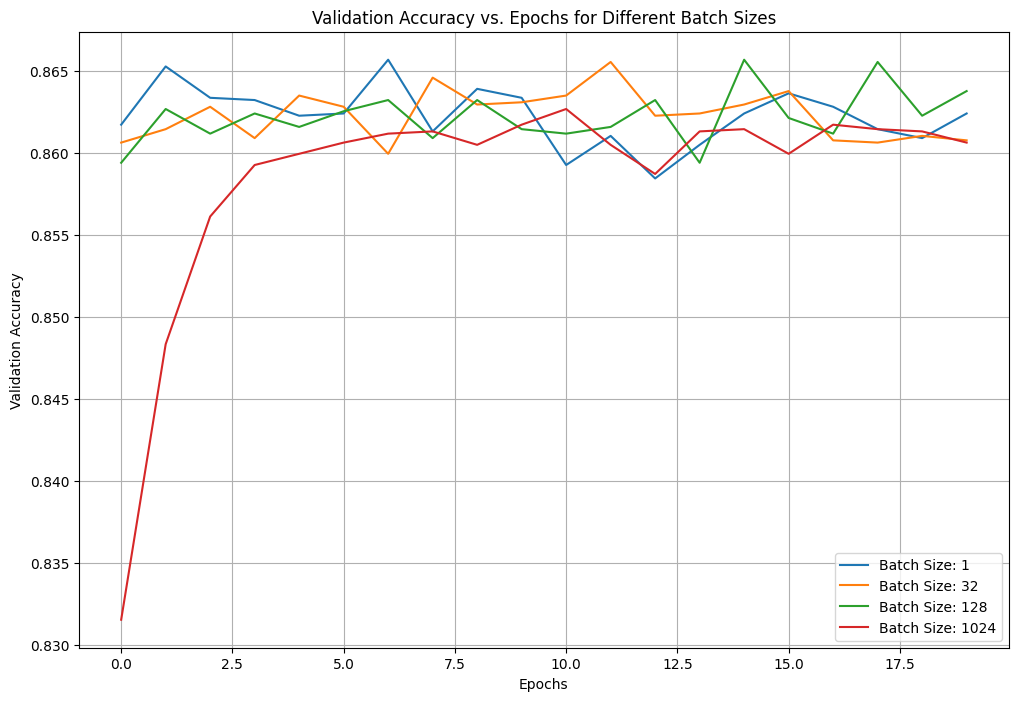

In [ ]:
plt.figure(figsize=(12, 8))

for bs, history in histories_bs.items():
    plt.plot(history.history['val_accuracy'], label=f'Batch Size: {bs}')

plt.title('Validation Accuracy vs. Epochs for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
results = []

for bs in batch_sizes:
    model = models_bs[bs]
    train_loss, train_acc = model.evaluate(X_train_processed, y_train, verbose=0, batch_size=1024)
    val_loss, val_acc = model.evaluate(X_val_processed, y_val, verbose=0, batch_size=1024)
    test_loss, test_acc = model.evaluate(X_test_processed, y_test, verbose=0, batch_size=1024)

    results.append({
        'Batch Size': bs,
        'Training Time (s)': training_times[bs],
        'Training Accuracy': train_acc,
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc
    })

results_df_bs = pd.DataFrame(results).set_index('Batch Size')

print("--- Final Performance Summary ---")
print(results_df_bs)

--- Final Performance Summary ---
            Training Time (s)  Training Accuracy  Validation Accuracy  \
Batch Size                                                              
1                  609.338309           0.874404             0.862408   
32                  22.243365           0.881102             0.860770   
128                  7.494327           0.872825             0.863773   
1024                 2.991669           0.862266             0.860633   

            Test Accuracy  
Batch Size                 
1                0.854784  
32               0.848915  
128              0.853828  
1024             0.854784  


**The batch size of 1 leads to the noisiest gradient updates. This is because the model's weights are updated after seeing only a single example, making the gradient calculation highly erratic and a poor approximation of the true gradient over the entire dataset.**

**the batch size of 1024 generalize the best, achieving the highest test accuracy of 0.854784 .**

In [ ]:
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.regularizers import l2

def create_large_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

input_shape = X_train_processed.shape[1]
EPOCHS = 100
BATCH_SIZE = 128

histories_reg = {}

--- Training the large model (Baseline) ---
Baseline model training complete.


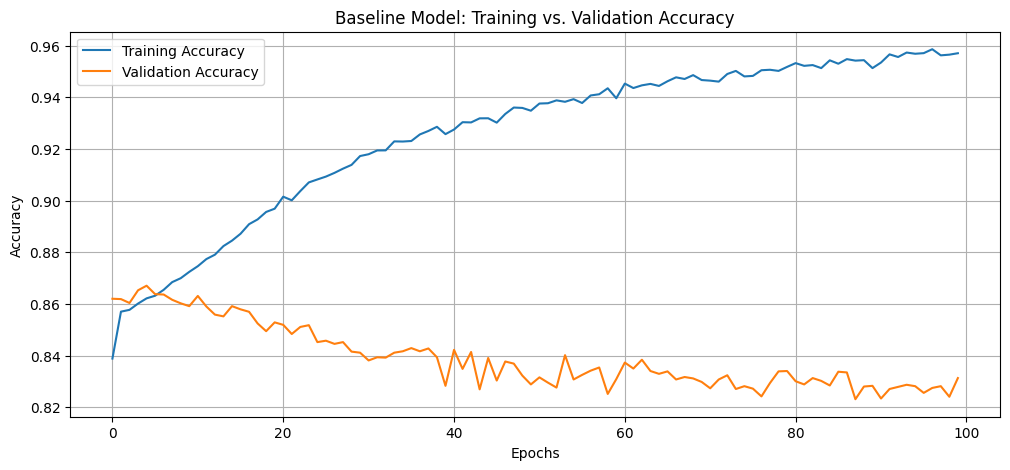

In [ ]:
print("--- Training the large model (Baseline) ---")

model_large = create_large_model(input_shape)

history_large = model_large.fit(
    X_train_processed, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val),
    verbose=0
)

histories_reg['Baseline'] = history_large
print("Baseline model training complete.")

plt.figure(figsize=(12, 5))
plt.plot(history_large.history['accuracy'], label='Training Accuracy')
plt.plot(history_large.history['val_accuracy'], label='Validation Accuracy')
plt.title('Baseline Model: Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def create_l2_model(input_shape):
    l2_val = 0.001

    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(256, activation='relu', kernel_regularizer=l2(l2_val)),
        Dense(128, activation='relu', kernel_regularizer=l2(l2_val)),
        Dense(64, activation='relu', kernel_regularizer=l2(l2_val)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

print("--- Training the L2 Regularized model ---")
model_l2 = create_l2_model(input_shape)

history_l2 = model_l2.fit(
    X_train_processed, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val),
    verbose=0
)

histories_reg['L2 Regularization'] = history_l2
print("L2 model training complete.")

--- Training the L2 Regularized model ---
L2 model training complete.


In [ ]:
def create_dropout_model(input_shape):
    dropout_rate = 0.3

    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

print("--- Training the Dropout Regularized model ---")
model_dropout = create_dropout_model(input_shape)

history_dropout = model_dropout.fit(
    X_train_processed, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val),
    verbose=0
)

histories_reg['Dropout'] = history_dropout
print("Dropout model training complete.")

--- Training the Dropout Regularized model ---
Dropout model training complete.


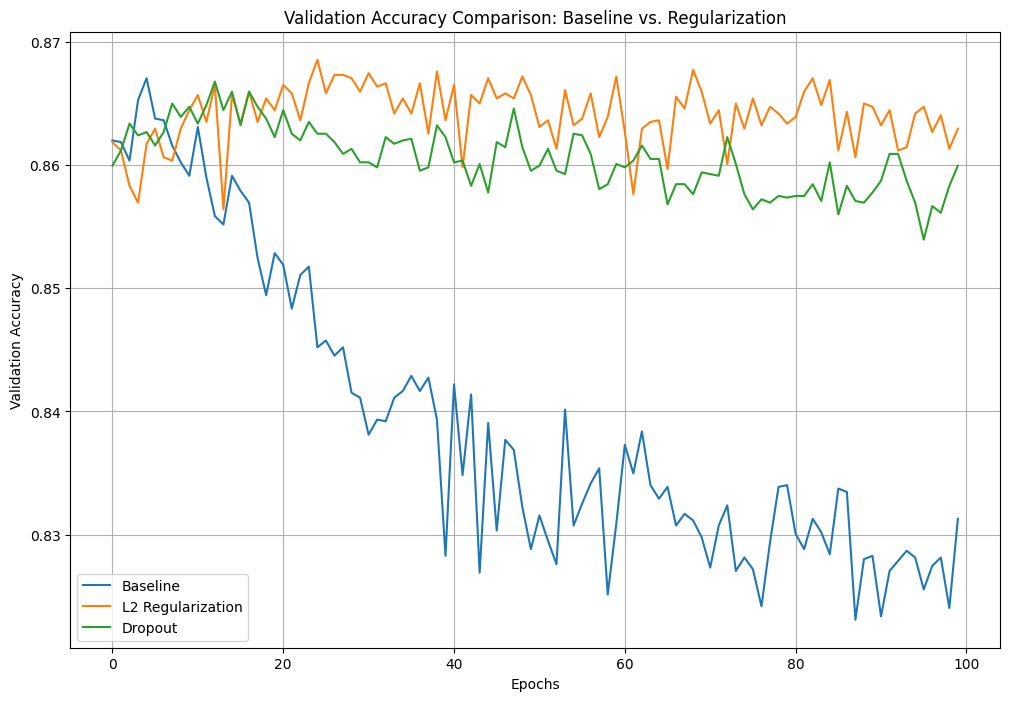

In [ ]:
plt.figure(figsize=(12, 8))

for name, history in histories_reg.items():
    plt.plot(history.history['val_accuracy'], label=name)

plt.title('Validation Accuracy Comparison: Baseline vs. Regularization')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
models_to_evaluate = {
    'Baseline': model_large,
    'L2 Regularization': model_l2,
    'Dropout': model_dropout
}

results = []
for name, model in models_to_evaluate.items():
    train_loss, train_acc = model.evaluate(X_train_processed, y_train, verbose=0)
    val_loss, val_acc = model.evaluate(X_val_processed, y_val, verbose=0)
    test_loss, test_acc = model.evaluate(X_test_processed, y_test, verbose=0)

    results.append({
        'Model': name,
        'Training Accuracy': train_acc,
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc,
        'Overfit Gap (Train-Test)': train_acc - test_acc
    })

results_df_reg = pd.DataFrame(results).set_index('Model')

print("--- Final Performance Summary ---")
print(results_df_reg)

--- Final Performance Summary ---
                   Training Accuracy  Validation Accuracy  Test Accuracy  \
Model                                                                      
Baseline                    0.963760             0.831286       0.827624   
L2 Regularization           0.870543             0.862954       0.854784   
Dropout                     0.917225             0.859951       0.842773   

                   Overfit Gap (Train-Test)  
Model                                        
Baseline                           0.136136  
L2 Regularization                  0.015760  
Dropout                            0.074452  


**Before regularization, the Baseline model achieved a validation accuracy of 83.13%. After applying regularization, performance improved significantly:
The L2 Regularization model achieved a validation accuracy of 86.30%.
The Dropout model achieved a validation accuracy of 86.00%.
Both regularization techniques successfully improved the model's ability to generalize to the validation set, boosting its performance by approximately 3 percentage points.**

**L2 Regularization was more effective in reducing overfitting. due to Smallest Overfitting Gap and highest Test Accuracy**

In [ ]:
from tensorflow.keras.callbacks import Callback

def create_large_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

class TestMetricsCallback(Callback):
    def __init__(self, test_data):
        super().__init__()
        self.test_data = test_data
        self.test_accuracies = []
        self.test_losses = []

    def on_epoch_end(self, epoch, logs=None):
        loss, acc = self.model.evaluate(self.test_data[0], self.test_data[1], verbose=0)
        self.test_accuracies.append(acc)
        self.test_losses.append(loss)

input_shape = X_train_processed.shape[1]
EPOCHS = 200
BATCH_SIZE = 128

In [ ]:
print("--- Training baseline model for 200 epochs ---")

model_baseline = create_large_model(input_shape)

test_metrics_callback = TestMetricsCallback(test_data=(X_test_processed, y_test))

history_baseline = model_baseline.fit(
    X_train_processed, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val),
    callbacks=[test_metrics_callback],
    verbose=0
)

print("Baseline model training complete.")

--- Training baseline model for 200 epochs ---


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
import pandas as pd

def create_large_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

class TestMetricsCallback(Callback):
    def __init__(self, test_data):
        super().__init__()
        self.test_data = test_data
        self.test_accuracies = []
        self.test_losses = []

    def on_epoch_end(self, epoch, logs=None):
        loss, acc = self.model.evaluate(self.test_data[0], self.test_data[1], verbose=0)
        self.test_accuracies.append(acc)
        self.test_losses.append(loss)

input_shape = X_train_processed.shape[1]
EPOCHS = 200
BATCH_SIZE = 128

In [16]:
print("--- Training baseline model for 200 epochs ---")

model_baseline = create_large_model(input_shape)

test_metrics_callback = TestMetricsCallback(test_data=(X_test_processed, y_test))

history_baseline = model_baseline.fit(
    X_train_processed, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val),
    callbacks=[test_metrics_callback],
    verbose=0
)

print("Baseline model training complete.")

--- Training baseline model for 200 epochs ---
Baseline model training complete.


In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history_baseline.history['accuracy'], label='Training Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.plot(test_metrics_callback.test_accuracies, label='Test Accuracy', linestyle=':')
plt.title('Model Accuracy Curves (Without Early Stopping)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

best_epoch = history_baseline.history['val_accuracy'].index(max(history_baseline.history['val_accuracy']))
print(f"The best validation accuracy was achieved around epoch {best_epoch}.")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

print("--- Training model with Early Stopping ---")

model_es = create_large_model(input_shape)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

history_es = model_es.fit(
    X_train_processed, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val),
    callbacks=[early_stopping_callback],
    verbose=0
)

print("Early Stopping model training complete.")

In [ ]:
# Cell 5: Compare Results

# Evaluate the baseline model (trained for all epochs)
base_train_loss, base_train_acc = model_baseline.evaluate(X_train_processed, y_train, verbose=0)
base_val_loss, base_val_acc = model_baseline.evaluate(X_val_processed, y_val, verbose=0)
base_test_loss, base_test_acc = model_baseline.evaluate(X_test_processed, y_test, verbose=0)

# Evaluate the Early Stopping model (already has best weights)
es_train_loss, es_train_acc = model_es.evaluate(X_train_processed, y_train, verbose=0)
es_val_loss, es_val_acc = model_es.evaluate(X_val_processed, y_val, verbose=0)
es_test_loss, es_test_acc = model_es.evaluate(X_test_processed, y_test, verbose=0)

# Create the summary DataFrame
results_data = {
    'Model': ['Without Early Stopping', 'With Early Stopping'],
    'Epochs Trained': [len(history_baseline.history['loss']), len(history_es.history['loss'])],
    'Validation Accuracy': [base_val_acc, es_val_acc],
    'Test Accuracy': [base_test_acc, es_test_acc]
}

results_df_es = pd.DataFrame(results_data).set_index('Model')

print("--- Final Performance Summary ---")
print(results_df_es)

**Early stopping is a form of regularization that prevents overfitting by halting the training process at the optimal moment, before the model begins to memorize the training data.**

**Optimizers: The choice of optimizer dictates how fast and stable a model trains. Adam is an excellent default due to its speed and adaptive nature, while simpler ones like SGD can be more stable but require more epochs to converge.
Batch Size: This controls the trade-off between training speed and generalization. Smaller batch sizes (e.g., 32, 128) introduce noise that acts as a regularizer, often improving test performance. Very large batches are faster per epoch but risk overfitting.
Regularization (L2 & Dropout): These techniques are essential to prevent complex models from overfitting. L2 encourages smaller weights, while Dropout forces the network to learn more robust features. Both help close the gap between training and validation performance.
Early Stopping: This is a simple and highly effective form of regularization. It saves the model at its point of peak generalization by stopping training when validation performance no longer improves, saving time and preventing overfitting.
Train/Validation/Test Splits: This data-splitting strategy is crucial for building a reliable model.
Train Set: For learning model weights.
Validation Set: For tuning hyperparameters and making decisions (like when to stop training).
Test Set: A final, unseen dataset to provide an unbiased estimate of the model's real-world performance.**

**Optimizer: Adam. It is a robust, fast, and effective default that requires minimal tuning.
Batch Size: Start with 32 or 64. This size is a widely-used sweet spot that balances computational efficiency with the regularization benefits of noisy updates.
Regularization: Combine Dropout on the dense layers with Early Stopping. Dropout is a powerful regularizer for deep networks, and Early Stopping is an essential safeguard.
Early Stopping: Always enable it with patience (e.g., 10-15 epochs) and restore_best_weights=True. It's the most efficient way to prevent overfitting and find the optimal training duration.
Data Splitting Strategy: A stratified 70% train, 15% validation, 15% test split. Stratification ensures that the class proportions are the same across all sets, which is critical for imbalanced datasets.**